Detected 977 anomalies across multiple features


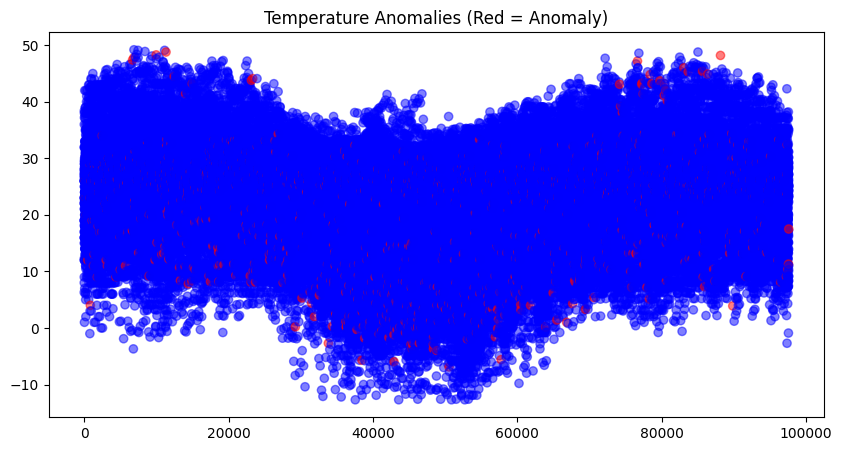

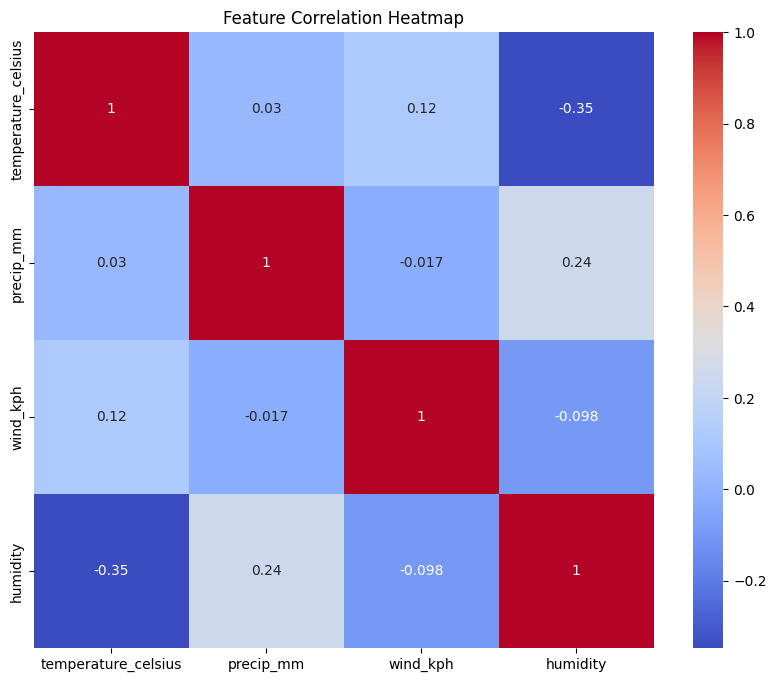

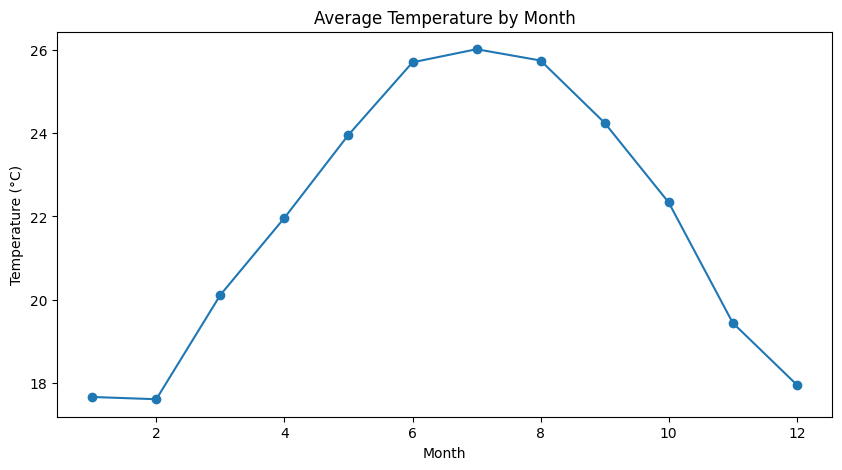

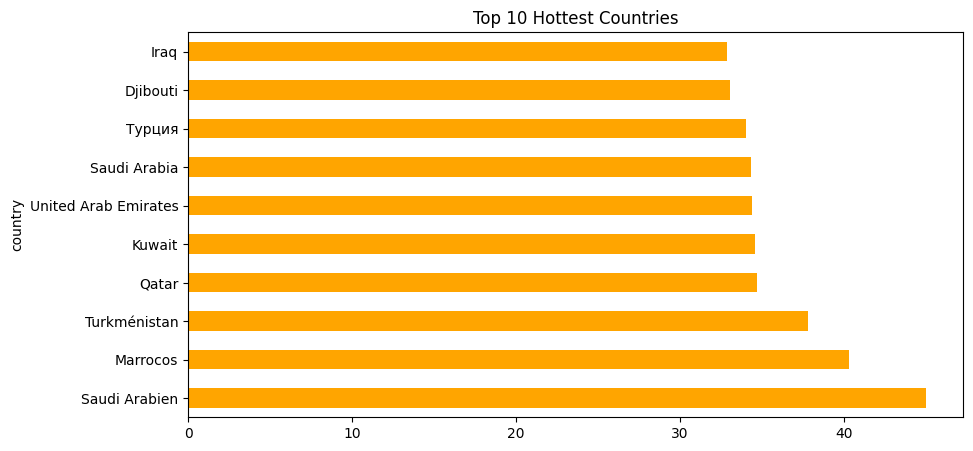

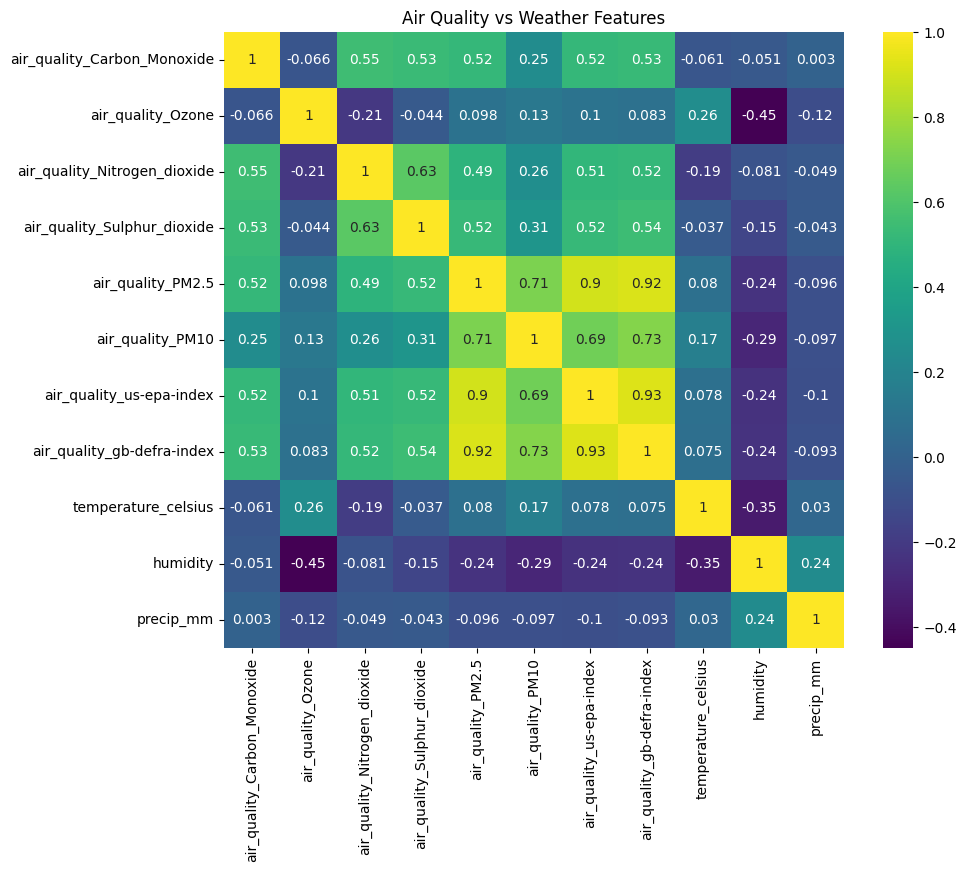

In [4]:
# ============================================================
# Weather Trend Forecasting: 05 Advanced Analysis (Updated)
# ============================================================

# ---------------------------
# Step 0: Imports & Setup
# ---------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Project root & figures folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
figures_dir = os.path.join(project_root, "reports", "figures")
os.makedirs(figures_dir, exist_ok=True)

# ---------------------------
# Step 1: Load cleaned data
# ---------------------------
cleaned_csv_path = os.path.join(project_root, "data", "processed", "weather_cleaned.csv")
df = pd.read_csv(cleaned_csv_path)
df["last_updated"] = pd.to_datetime(df["last_updated"])

# ---------------------------
# Step 2: Anomaly Detection (Multiple Features)
# ---------------------------
features_to_check = ['temperature_celsius','precip_mm','wind_kph','humidity']
iso = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = iso.fit_predict(df[features_to_check])
anomalies = df[df['anomaly']==-1]
print(f"Detected {len(anomalies)} anomalies across multiple features")

# Plot anomalies for temperature
plt.figure(figsize=(10,5))
plt.scatter(df.index, df['temperature_celsius'], c=np.where(df['anomaly']==-1,'r','b'), alpha=0.5)
plt.title("Temperature Anomalies (Red = Anomaly)")
fig_path = os.path.join(figures_dir, "temperature_anomalies_updated.png")
plt.savefig(fig_path, bbox_inches='tight')
plt.show()

# ---------------------------
# Step 3: Correlation Heatmap
# ---------------------------
plt.figure(figsize=(10,8))
sns.heatmap(df[features_to_check].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
fig_path = os.path.join(figures_dir, "correlation_heatmap.png")
plt.savefig(fig_path, bbox_inches='tight')
plt.show()

# ---------------------------
# Step 4: Climate Trends by Month
# ---------------------------
df['month'] = df['last_updated'].dt.month
monthly_avg_temp = df.groupby('month')['temperature_celsius'].mean()
plt.figure(figsize=(10,5))
monthly_avg_temp.plot(marker='o')
plt.title("Average Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
fig_path = os.path.join(figures_dir, "avg_temp_by_month_advanced.png")
plt.savefig(fig_path, bbox_inches='tight')
plt.show()

# ---------------------------
# Step 5: Top Countries by Temperature
# ---------------------------
top_countries = df.groupby('country')['temperature_celsius'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_countries.plot(kind='barh', color='orange')
plt.title("Top 10 Hottest Countries")
fig_path = os.path.join(figures_dir, "top_countries_temperature.png")
plt.savefig(fig_path, bbox_inches='tight')
plt.show()

# ---------------------------
# Step 6: Environmental Impact Analysis
# ---------------------------
# If air quality columns exist
air_cols = [col for col in df.columns if "air_quality" in col]
if air_cols:
    corr_air = df[air_cols + ['temperature_celsius','humidity','precip_mm']].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_air, annot=True, cmap='viridis')
    plt.title("Air Quality vs Weather Features")
    fig_path = os.path.join(figures_dir, "air_quality_correlation.png")
    plt.savefig(fig_path, bbox_inches='tight')
    plt.show()
